In [31]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy

In [32]:
def RK4step(f,told, uold, h): # Denna klassen skrivs just nu där f = skalär*y. 
    Y1 = f(uold)    #Y1 definieras som f(uold,told).
    Y2 = f(uold + h*Y1/2)
    Y3 = f(uold + h*Y2/2)
    Y4 = f(uold + h*Y3)
    unew = uold + (h/6)*(Y1 + 2*Y2 + 2*Y3 + Y4)

    return unew


In [33]:
def BDFstep(f, Yn, Yn1, h):
    func  = lambda Yn2: Yn2 - 4/3*Yn1 + 1/3*Yn - 3*h*f(Yn2)/2
    Yn2 = scipy.optimize.fsolve(func, Yn1)
    return Yn2[-1]
    
def BDFsolver(f, t0, tf, N, y0, tol):
    h = (tf - t0)/N
    t = [t0]
    Y = [y0]
    Yn = y0
    Yn1 = RK4step(f, t0, Yn, h)
    Y.append(Yn1)
    t.append(t[-1] + h)
    for i in range(N-2):
        y = BDFstep(f, Yn, Yn1, h)
        Y.append(y)
        Yn = Yn1
        Yn1 = y
        t.append(t[-1] + h)
    return Y


Amount of steps:  1000


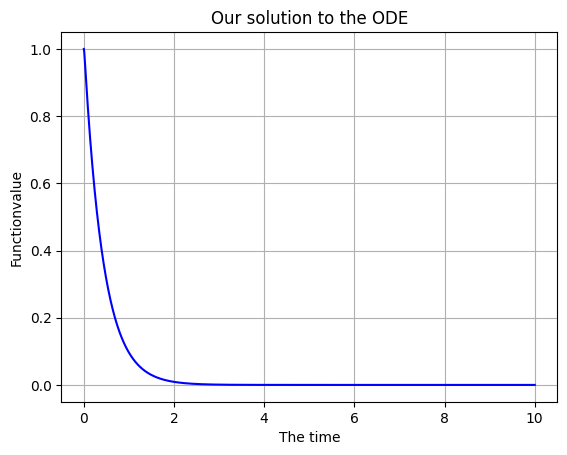

In [35]:
y0 = 1
f = lambda y: -1.05*y
Y = BDFsolver(f, 0, 10, 1000, y0, 1e-6)
t = np.linspace(0, 10, 1000)
plt.xlabel("The time")
plt.ylabel("Functionvalue")
plt.title("Our solution to the ODE")
plt.grid()
plt.plot(t, Y, 'b')
print("Amount of steps: ", len(t))
